<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/BarChart_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bar Charts Pattern Language
## Data Set: Pokemon

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
pokemon = pd.read_csv(path + 'pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Bar Chart using Seaborn
A basic bar chart of frequencies can be created through the use of seaborn's `countplot` function.

```
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```

### Create a vertical bar chart with default colors


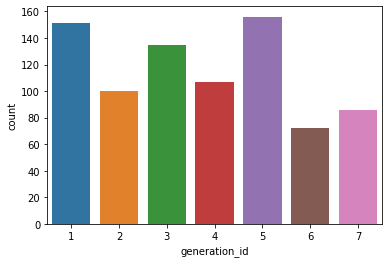

In [3]:
sb.countplot(data=pokemon, x='generation_id');

### Create a vertical bar chart with a uniform single color

The `color_palette()` returns the the current / default palette as a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 

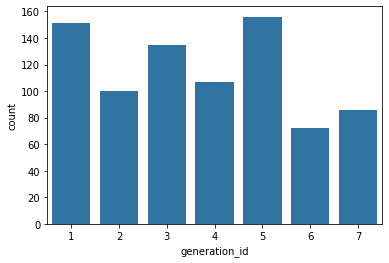

In [4]:
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

### Create a vertical bar chart with ordered bars

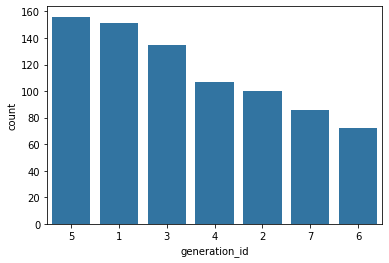

In [5]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

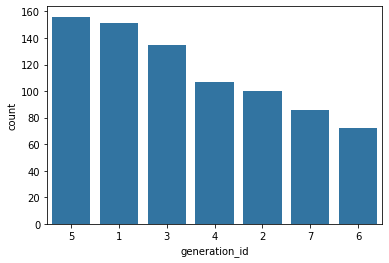

In [6]:
# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

### Rotate the category labels (not axes)

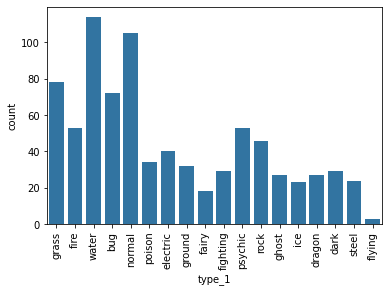

In [8]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

### Rotate the axes clocwise = Create a horizontal bar chart

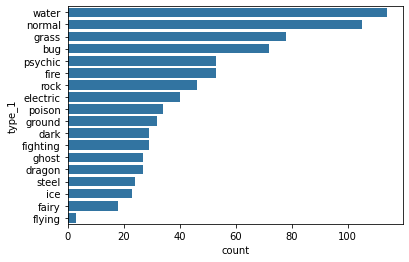

In [9]:
# Plot the Pokemon type on a horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

### Unpivot *type* variable = Reshape the pokemon dataframe
We will use the `pandas.DataFrame.melt()` method to unpivot a DataFrame from wide to long format, optionally leaving identifiers set. The syntax is:
```
DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)
```

In [10]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
print(pkmn_types.shape)
pkmn_types.head()

(1614, 4)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


### Plot the horizontal bar chart

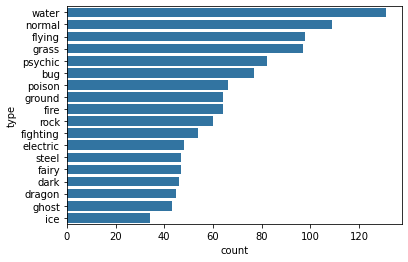

In [11]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()

# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index

# Plot the horizontal bar chart
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### Plot a bar chart with relative frequency (the proportions)

In [15]:
# Return the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon

# Use numpy.arange() function to produce a set of evenly spaced proportioned  
# values between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)

# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Print parameters
print('max_prop = ', max_prop)
print('tick_props = ', tick_props)
print('tick_names = ', tick_names)

max_prop =  0.10808580858085809
tick_props =  [0.   0.02 0.04 0.06 0.08 0.1 ]
tick_names =  ['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']


The `xticks` and `yticks` functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

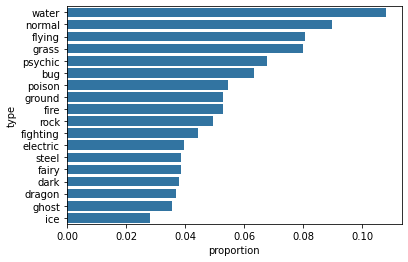

In [16]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');